# DEEPOO-1-224x224 MODEL FULL INT8 QUANTIZATION

In [1]:
!git clone https://github.com/patrikflorek/deepoo-1.git

Cloning into 'deepoo-1'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 99 (delta 48), reused 99 (delta 48), pack-reused 0 (from 0)
Receiving objects: 100% (99/99), 1.15 MiB | 3.42 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [5]:
%cd deepoo-1

/content/deepoo-1


In [7]:
# TODO: copy the trained model into deepoo-1/models/250810/deepoo-1-224x224-best_model.h5
!mkdir -p models/250810
!mv /content/deepoo-1-224x224-best_model.h5 models/250810

In [8]:
# TODO: copy and extract normalized-224x224.tar into deepoo-1/data directory
!mkdir -p data
!tar -xf /content/normalized-224x224.tar.gz -C data

In [9]:
!python src/export_tflite.py models/250810/deepoo-1-224x224-best_model.h5 \
       --num_calib_images 100 \
       --output_dir models/tflite

2025-08-11 13:41:56.789617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754919716.807269    4926 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754919716.812658    4926 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754919716.826306    4926 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754919716.826331    4926 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754919716.826335    4926 computation_placer.cc:177] computation placer alr

In [11]:
# !python src/evaluate_tflite.py models/tflite/deepoo-1-224x224-best_model_int8.tflite

2025-08-11 13:51:21.730279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754920281.750045    7301 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754920281.756199    7301 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754920281.771037    7301 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754920281.771063    7301 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754920281.771067    7301 computation_placer.cc:177] computation placer alr

In [12]:
!python src/evaluate_tflite.py models/tflite/deepoo-1-224x224-best_model_int8.tflite --visualize --num_vis 12

2025-08-11 13:55:01.366952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754920501.399277    8230 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754920501.410429    8230 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754920501.436761    8230 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754920501.436806    8230 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754920501.436814    8230 computation_placer.cc:177] computation placer alr

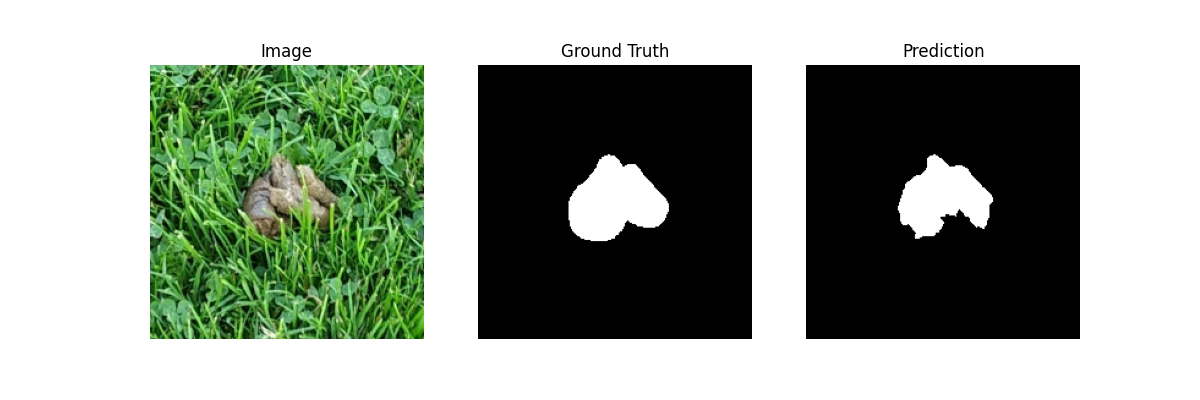

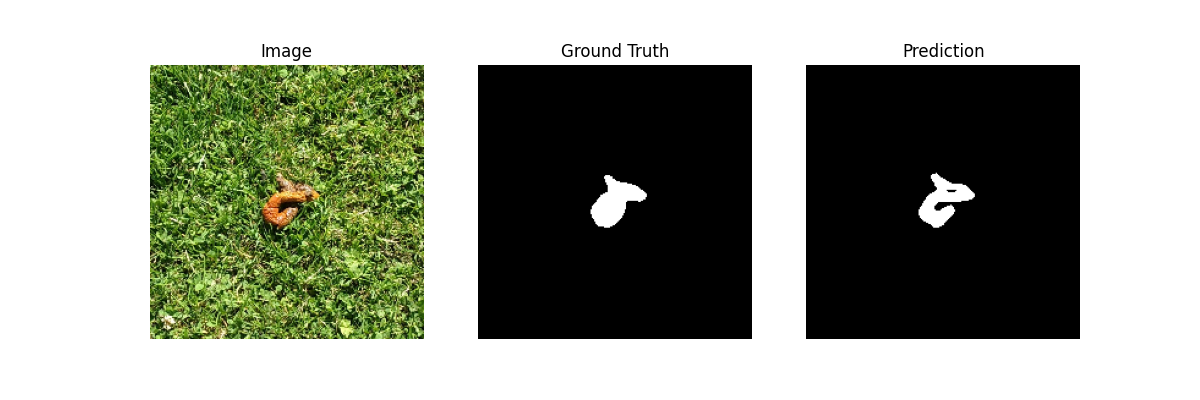

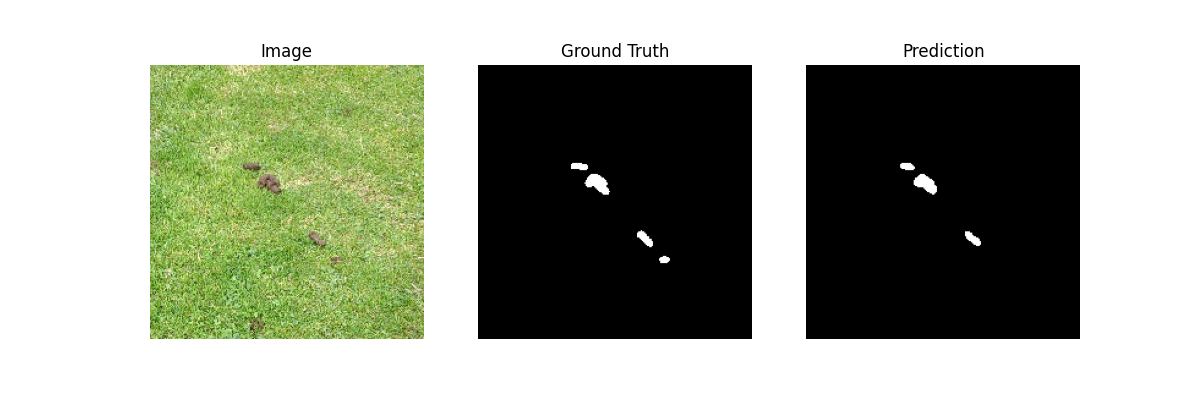

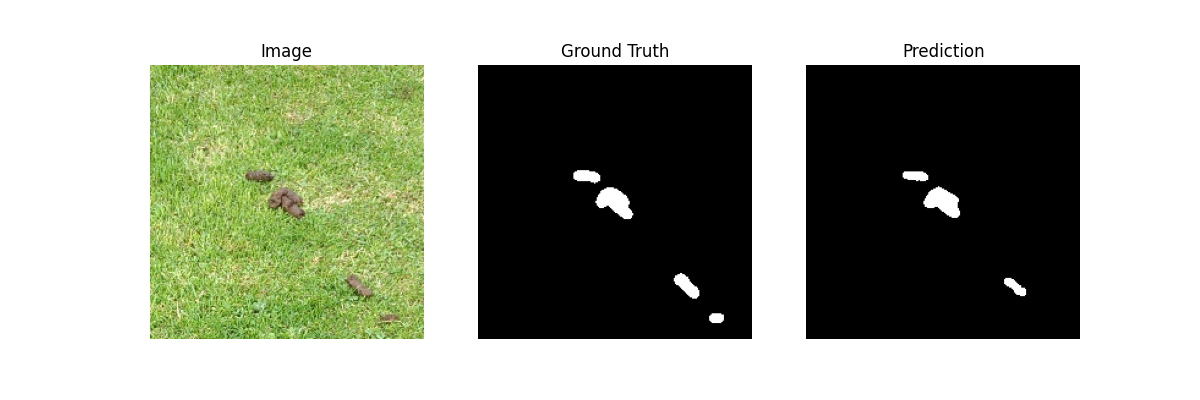

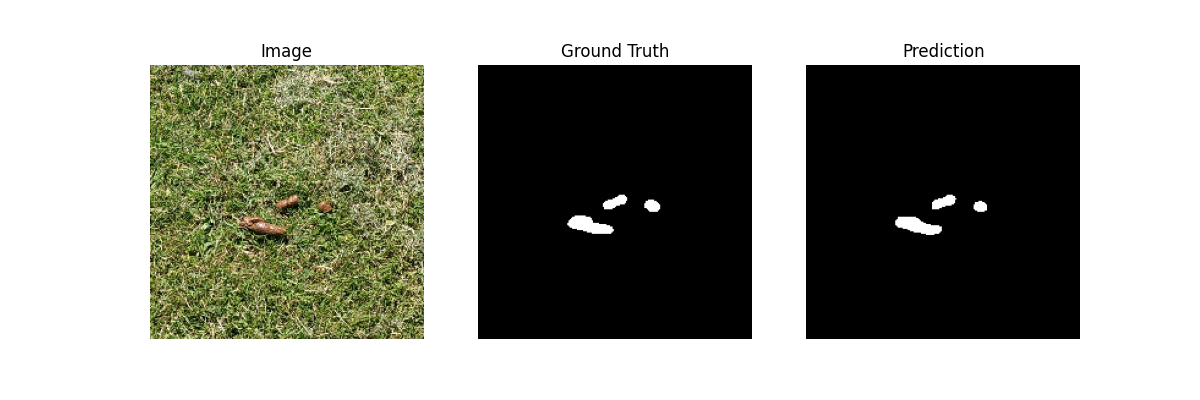

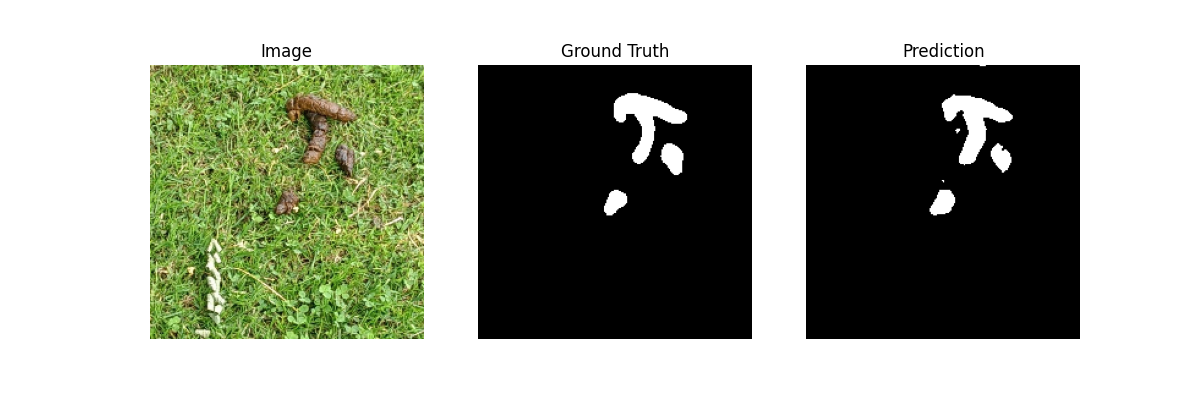

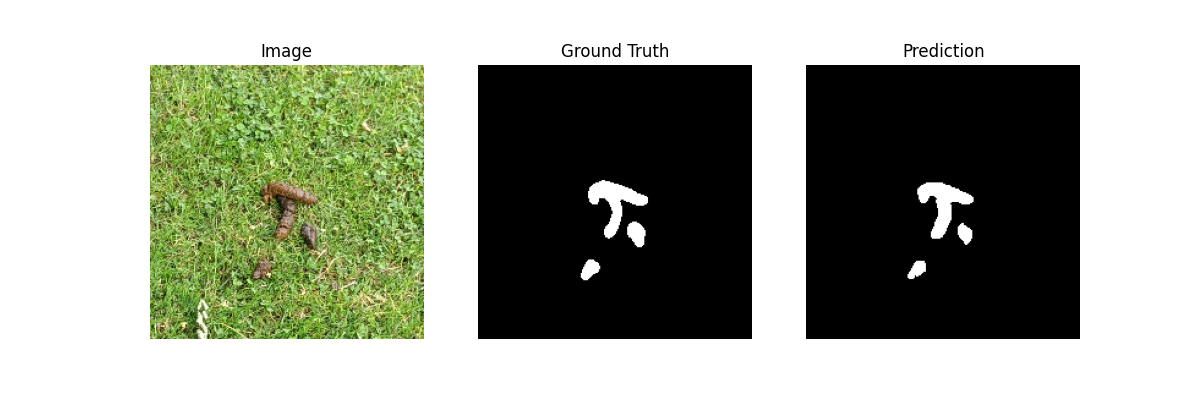

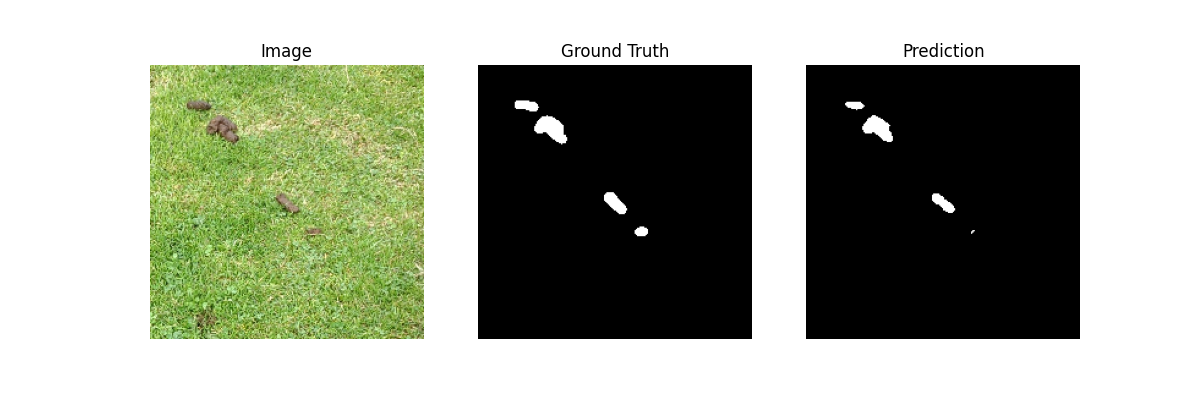

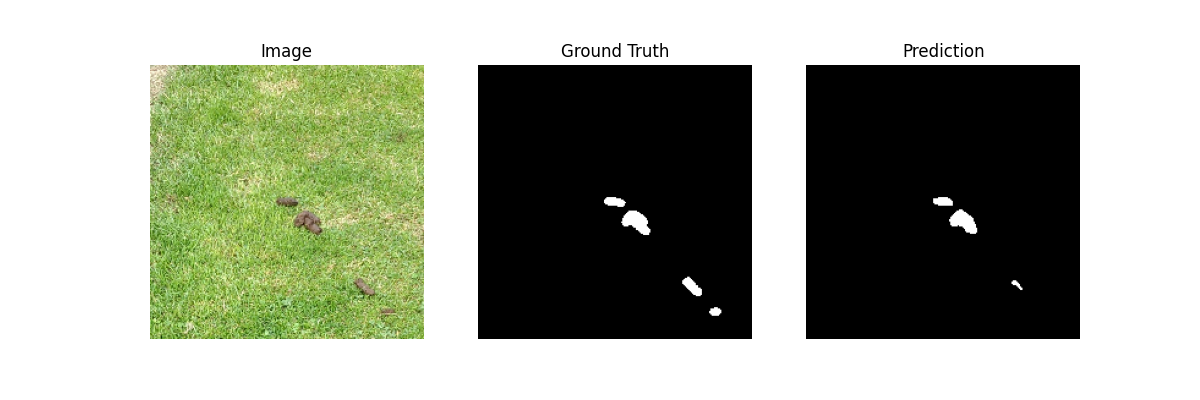

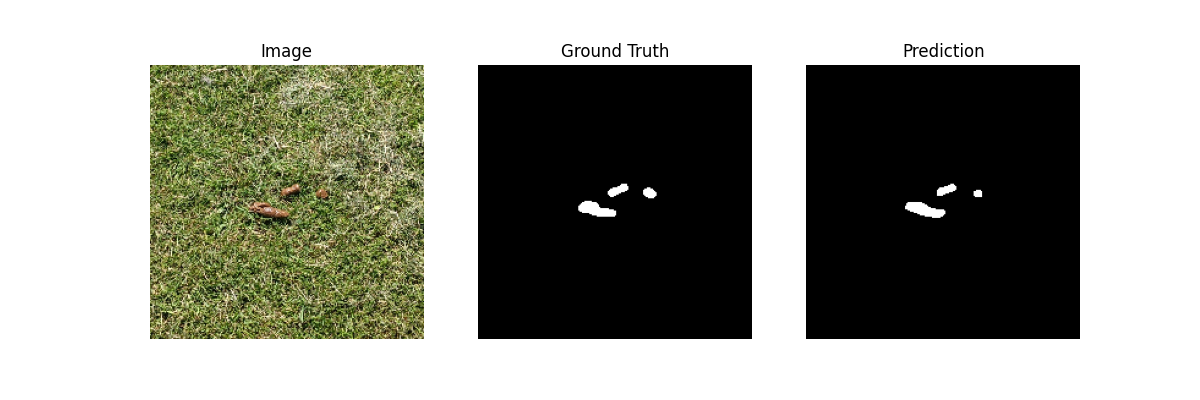

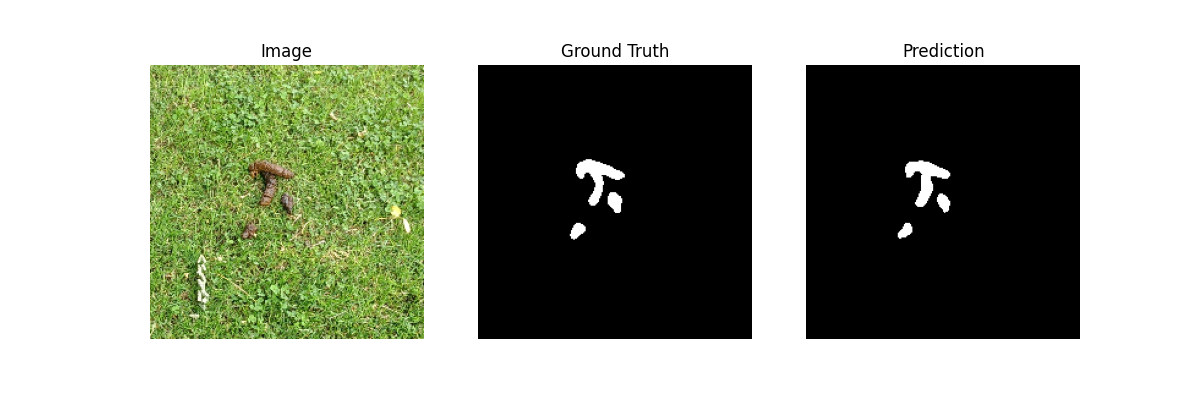

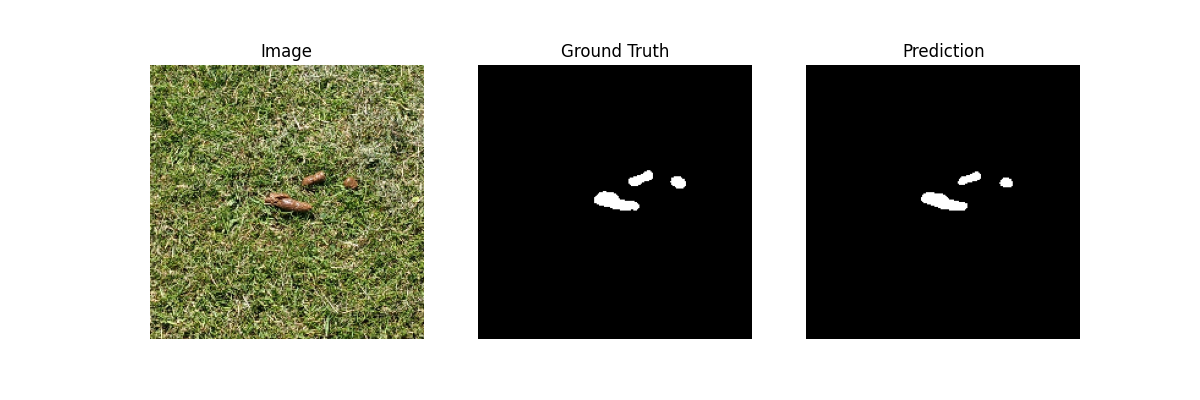

In [13]:
# prompt: display all images in `models/tflite/evaluation` folders

from IPython.display import Image, display
import os

image_folder = 'models/tflite/evaluation'

if os.path.exists(image_folder):
  for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
      image_path = os.path.join(image_folder, filename)
      display(Image(filename=image_path))
else:
  print(f"Folder '{image_folder}' not found.")